Osnabrück University - Computer Vision (Winter Term 2020/21) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 02: Image Enhancement

## Introduction

This week's sheet should be solved and handed in before the end of **Saturday, November 14, 2020**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Euclidean Space) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary.
There will be a similar exercise on every following sheet.
It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them.
Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session.
Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *Euclidean space*? What is the *Cartesian plane*? How are they usually denoted? How to write points in these spaces?

- Euclidean space is the fundamental space of classical geometry.
- A Cartesian plane (named after French mathematician Rene Descartes, who formalized its use in mathematics) is defined by two perpendicular number lines: the x-axis, which is horizontal, and the y-axis, which is vertical. Using these axes, we can describe any point in the plane using an ordered pair of numbers.
- Points in the space: (a,b,c)
- Points in the plane: (a,b)

**b)** What is the *norm* of a vector in a Euclidean space? How to *add* and *substract* two vectors? How is the *Euclidean distance* defined? Are there other ways to measure distances?

- Norm or Magnitude of a vector: sqrt(a²+b²+c²)
- You can add or substract two vektors elementwise
- In coordinate geometry, the distance formula gives the euclidean distance between any two points in a plane, or the length of the line segment joining any two points in a plane.
- In which context is this question ment? There are a lot of possibilities to measure distance in real world.

**c)** What is the (standard) *scalar product* of two vectors? How is it related to the length and angle between these vectors? Name some use cases.

- Scalar product: a*b=|a|*|b|*cos(a/b)
- The scalar product is a value that gives an idea, if two vektors are pointing in same directions and how one vector contributes with its absolute value to the direction of the other.

## Assignment 1: Contrast enhancement [5 Points]

### a) Image Contrast

Describe the concept of contrast in your own words and introduce different ways to measure it. How can low contrast be caused and when is this a problem (and when not)? What can be done to improve contrast?

Concept of contrast:<br>
The contrast could be discribed as the difference between two neighbouring pixels or areas in a picture. If the contrast is low details are not recognizeable. 

Ways to measure contrast:<br>
- Global contrast: Largest difference of gray values in the image
- Local contrast: For example the average gray value difference of neighboring pixels

How can low contrast be caused:<br>
Low contrast could be caused through under- or overexposure of light. 

When is this a problem (and when not)?<br>
Low contrast becomes a problem if the pictures quality suffers due to its intended use. Low contrast could be as well a wanted effect for photographs and thus wanted.


### b) Histogram equalization and entropy

How does histogram equalization work? What is entropy and how is it related to histogram equalization? For your answer focus on the (conceptually simpler) continuous case.

How does histogram equalization work?What is entropy and how is it related to histogram equalization?<br>
Histrogram equalisation trys to maximize entropy E of the histogram for a given picture. In other words it distributes the grey values from peaks in the histogram to its valleys.



### c) Discrete histogram equalization

What problems occur when considering discrete images (i.e. with discrete coordinates and a finite number of gray levels)? Explain the tables on the lecture slides (CV-04 slides 22/23).

The problem with discrete signals (like pixels in pictures) lays in the distribution of peaks to valleys. To distribute the information equally on the whole range its eventually neccessary to leave out some spots. Thus this function is non-linear and can´t be reversed.  

## Assignment 2: Computing Contrast and Entropy [5 Points]


### a) Computing contrast

Provide functions to compute the local contrast, global contrast, and entropy of an image.

0
255


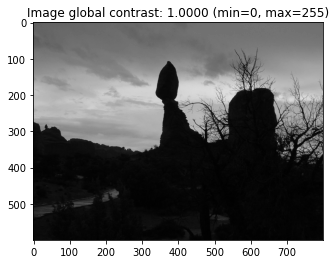

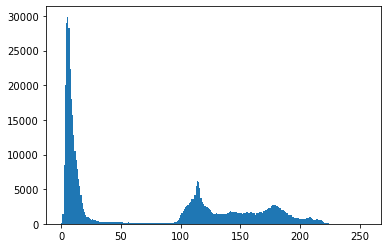

In [24]:
%matplotlib inline
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

def global_contrast(img, value_range=None):
    """
    Compute the global contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
        value_range (tuple): The minimum and maximum values of the gray scale.
    
    Returns:
        contrast (float): The local contrast of the image. 
    """

    # determine range: simplified, just checks for uint8 
    if value_range is None:
        value_range = (0, 255) if img.dtype == np.uint8 else (0., 1.)
        
    print(np.amin(img))
    print(np.amax(img))
   
    contrast = (1/255)*(np.amax(img)-np.amin(img))

    return contrast

img = imread('images/dark.png')
plt.title("Image global contrast: {:.4f} (min={}, max={})".format(global_contrast(img), img.min(), img.max()))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

<ipython-input-25-65edadec2246>:29: RuntimeWarning: overflow encountered in ubyte_scalars
  result=math.sqrt((img_patch[1,1]-((img_patch[0,1]+img_patch[1,0]+img_patch[1,2]+img_patch[2,1])/4))**2)


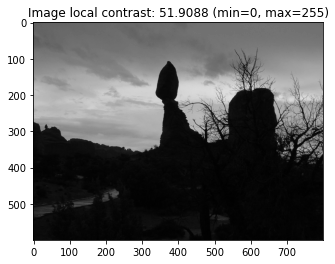

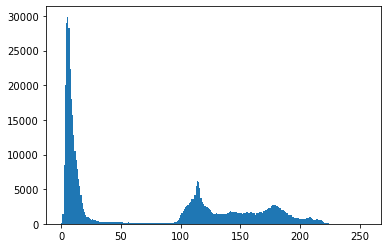

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
import math

def local_contrast(img, value_range=None):
    """
    Compute the global contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
        value_range (tuple): The minimum and maximum values of the gray scale.
    
    Returns:
        contrast (float): The local contrast of the image. 
    """
    
    
    M,N = img.shape
    rows_to_clc = 1                      
    cols_to_clc = 1
    Local_sum=0
    for img_row in range(M):
        for img_col in range(N):
            if img_row >= rows_to_clc and img_row < M-rows_to_clc and img_col >= cols_to_clc and img_col < N-cols_to_clc:
                
                img_patch = img[img_row-1:img_row+2, img_col-1:img_col+2]
                
                result=math.sqrt((img_patch[1,1]-((img_patch[0,1]+img_patch[1,0]+img_patch[1,2]+img_patch[2,1])/4))**2)
               
                Local_sum=Local_sum+result/(M*N)
                
    contrast=Local_sum
            
    return contrast


img = imread('images/dark.png')
plt.title("Image local contrast: {:.4f} (min={}, max={})".format(local_contrast(img), img.min(), img.max()))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

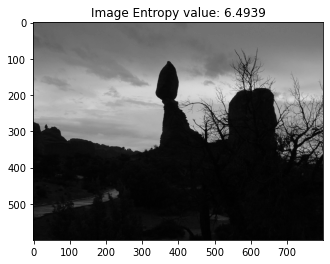

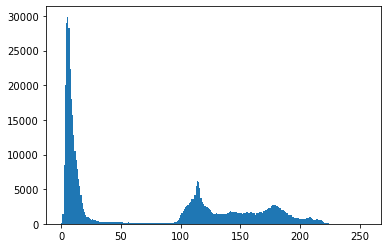

In [26]:
%matplotlib inline
import numpy as np
import math
from imageio import imread

def entropy(img):
    """
    Compute the entropy for a given image.
    Args:
        img (ndarray): The grayscale image to compute the entropy for.
    
    Returns:
        img_entropy (float): The entropy of the image. 
    """
    #Convert the imgae to a 1D-array wih np.ravel
    img_one_D=np.ravel(img)
    #Assign value to the 256 bins of a new histogram
    hist = np.histogramdd(img_one_D, bins = 256)
    #Scale the Classes to the maximum possible ammount auf pixels in picture
    marg=hist[0]/img.size  
    #Convert to list for every value in marg greater than 0
    marg = list(filter(lambda p: p > 0, np.ravel(marg)))
    #Calculation of entropy through given formular
    entropy = -np.sum(np.multiply(marg, np.log2(marg)))
    
    return entropy

img = imread('images/dark.png')
plt.title("Image Entropy value: {:.4f}".format(entropy(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()


In [27]:
np.histogramdd?

In [28]:
np.ravel?

In [29]:
list?

In [30]:
filter?

### b) Example images

* construct an (artificial) image with high global contrast but low local contrast
* construct an (artificial) image with low global constrast but high local contrast
* construct an (artificial) image with maximal entropy but low local contrast

0
255


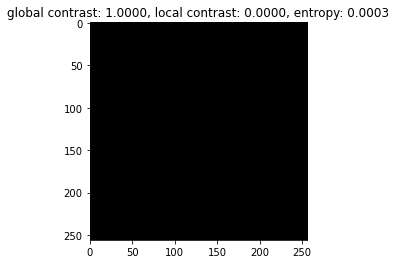

0
127


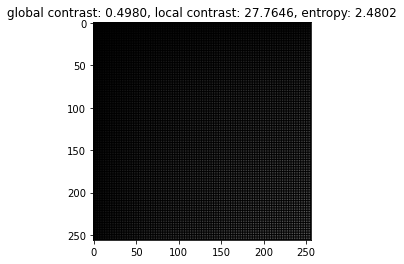

0
1


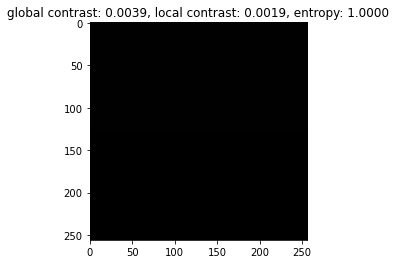

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

def image_info(img):
    """ Displays an image, local and global contrast, and the entropy
    
    Args:
        img (ndarray): Image which is displayed and statics are computed for.
        
    """
    info = "global contrast: {:.4f}, local contrast: {:.4f}, entropy: {:.4f}"
    plt.title(info.format(global_contrast(img), local_contrast(img), entropy(img)))
    plt.imshow(img, vmin=0, vmax=255)
    plt.show()


img1 = np.zeros((256, 256),np.uint8)

img1[0][0]=255
        
image_info(img1)


img2 = np.zeros((256, 256),np.uint8)

for i in range(np.int32(img2.shape[0])//2):
    for j in range(np.int32(img2.shape[1])//2):
        img2[i*2][j*2]=math.sqrt(j*i)

image_info(img2)


img3 = np.zeros((256, 256),np.uint8)
j=0
i=0
for i in range(0, 127):
    for j in range(0, 256):
        img3[i][j]=1
        j=j+1
    i=i+1
    j=0
    

image_info(img3)

## Assignment 3: Adaptive Histogram Equalization (AHE) [5 Points]

We have uploaded the original article on Contrast Limited Adaptive Histogram Equalization to StudIP [Zuiderveld, 1994]. You may use it as a base to answer this exercise.

### a) Adaptive Histogram Equalization (AHE)

Describe in your own words the idea of AHE. Why was it introduced and what are its main drawbacks?

The idea here is to use a kernel of a predefinded size and compute a histogram just for this area. It was introduced because it gave better results on details for a smaller area then to just enhance contrast for the whole image. The problem here lays in the size of the kernel. If it´s to small you will likely miss out a bunch of classes for one pixel. If the kernel is too big you loose the main advantage of this method.

### b) Contrast Limited Adaptive Histogram Equalization (CLAHE)

Describe in your own words the idea of CLAHE. Why was it introduced and how does it work? 

CLAHE just limits the maximum contrast of AHE to a certain limit. It was introduced to prevent excessive enhancement of local contrast.

### c) Computation of AHE

How can AHE be implemented efficiently? Explain how the interpolation scheme works, why it is a valid approximation, and why it improves the runtime? Can you think of another way to compute AHE efficiently?

YOUR ANSWER HERE

### d) Applying AHE and CLAHE

Lookup functions for computing HE, AHE and CLAHE in the module `skimage.exposure` and apply them to the image `canada.png`. Compare your results to the lecture slides (CV-04, slide 31).

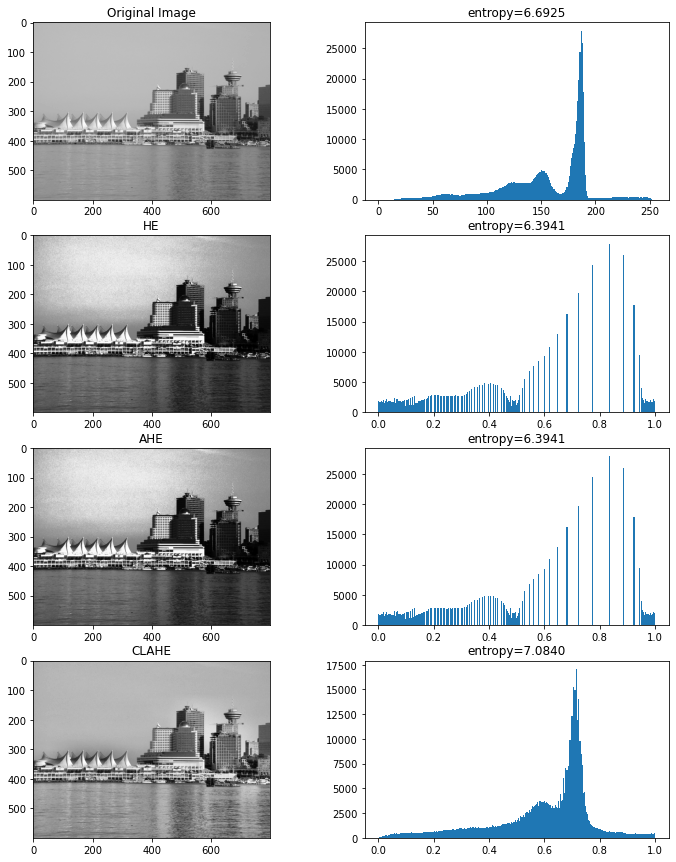

In [32]:
%matplotlib inline
# YOUR CODE HERE
from imageio import imread
import matplotlib.pyplot as plt
import skimage
from skimage import exposure

img = imread('images/canada.png', pilmode='L')

img_he =  skimage.exposure.equalize_hist(img)
img_ahe = skimage.exposure.equalize_hist(img) 
img_clahe = skimage.exposure.equalize_adapthist(img) 


plt.figure(figsize=(12, 15))
plt.subplot(4,2,1)
plt.title("Original Image")
plt.imshow(img)
plt.subplot(4,2,2)
plt.title("entropy={:.4f}".format(entropy(img)))
plt.hist(img.flatten(), 256, (0, 255))

plt.subplot(4,2,3)
plt.title("HE")
plt.imshow(img_he)
plt.subplot(4,2,4)
plt.title("entropy={:.4f}".format(entropy(img_he)))
plt.hist(img_he.flatten(), 256, (0, 1))

plt.subplot(4,2,5)
plt.title("AHE")
plt.imshow(img_ahe)
plt.subplot(4,2,6)
plt.title("entropy={:.4f}".format(entropy(img_ahe)))
plt.hist(img_ahe.flatten(), 256, (0, 1))

plt.subplot(4,2,7)
plt.title("CLAHE")
plt.imshow(img_clahe)
plt.subplot(4,2,8)
plt.title("entropy={:.4f}".format(entropy(img_clahe)))
plt.hist(img_clahe.flatten(), 256, (0, 1))

plt.show()

## Assignment 4: Colormaps[5 Points]

Colormaps can be used to map a grayscale image to a pseudo color image for contrast enhancment for human viewing. Three non-monotonic functions are applied to map a gray value to each of the three color channels of the output image.


### a) Describe the following three colormap classes in one sentence each:

* Sequential
* Diverging
* Qualitative

You may have a look at the matplotlib documentation.

Sequential: The color in a sequential colormap stays the same and rises in brightness. Could be used for example to show development of a process etc.
Example: Rising temperature in heating process

Diverging: Two colours that could meet up at a diverging value to represent direction to additional brightness to show intensitiy / ammount
Example: Heatmap for temperature between two extremes (0°C and 100°C)

Qualitative: Just miscelanous colours relating to a certain context for an image (display something detected)
Example: Detect a certain pattern in a picture and display it to the user via colourmap.

For each of the above colormap classes give one example and display the red, green, and blue curves like on (CV-04, slide 35):

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

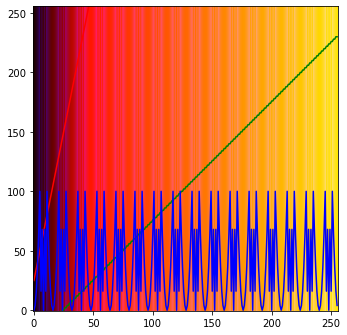

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

color = []

# The following is just for demonstration: replace and extend by your own examples
color.append(np.asarray((lambda x: 5*x+25, 
              lambda x: (x//2) * 2-24,
              lambda x: (2*x)**2 % 128)))

#1D-array (List) from 0 to 255
gray = np.arange(0,256)
print(gray)
#2D-array (matrix) shape 256x256 and 

a = np.tile(np.arange(256),(256,1))

print(a)
print(a.shape)

plt.figure(figsize=(12,12))
for i in range(len(color)):
    plt.subplot((len(color)//2)+1,2,i+1)
    plt.plot(gray, color[i][0](gray), 'red')
    plt.plot(gray, color[i][1](gray), 'green')
    plt.plot(gray, color[i][2](gray), 'blue')
    plt.imshow(np.stack([color[i][0](a),color[i][1](a),color[i][2](a)],axis=2)/256, origin='lower')
plt.show()

### b) Implement Cube Helix colormapping 
Generate a LookUp table with $256 \times 3$ entries describing the color values for all gray values beginning with black (0) up to white (255). Use the given parameters and use the following formula to compute an RGB value from a gray value $g$:
$$ \begin{pmatrix}R \\ G \\ B\end{pmatrix} =  g ^ \gamma + a \begin{pmatrix}0.14861 & + 1.78277 \\
-0.29227 & -0.90649 \\ +1.97294 & 0\end{pmatrix} \begin{pmatrix}\cos \theta \\ \sin \theta\end{pmatrix}$$
with $\theta = 2 \pi (\frac{\text{start_color }}{3} + \text{rotations}\cdot g)$ and $ a = \frac{\gamma\cdot\text{hue}\cdot g\cdot( 1 - \gamma g)}{2}$ (with 'start_color', 'rotations' and 'hue' being parameters describing the form of the helix, and $\gamma$ being the usual $\gamma$-factor).

Remember that this formula is for values between $0$ and $1$.
For more information you may refer to http://astron-soc.in/bulletin/11June/289392011.pdf

In [38]:
%matplotlib inline
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
import math

start_color = 1
rotations = 3
hue = 2
gamma = 1
m = np.mat([[-.14861, 1.78277],
            [-.29227, -.90649],
            [1.97294, 0]])
gray = np.arange(0,256)

gray=gray/255

print(gray)

np.zeros

def generate_cube_helix_lookup_table():
    """Generate a lookup table for cube helix color mapping.
    
    Return: 
        lookup_table (ndarray): The cube helix color map. (256,3)
    """
    lookup_table = np.empty((256,3), float)
    for cur_gray_val in gray
    for cur_gray_val in range(len(gray)):
        i       
    return lookup_table


def apply_colormap(img, loookup_table):
    """Apply a colormap to an image
    
    Args:
        img (ndarray): The image (ndim=2).
        lookup_table (ndarray): The lookup table (shape=(256,3)).
        
    Return:
        color_img (ndarray): The color image resulting from application of the colormap.
    """
    color_img = loookup_table[img]
    color_img[color_img>1] = 1.
    color_img[color_img<0] = 0.
    return color_img

img = imread('images/lung.png', pilmode='L')
lookup_table = generate_cube_helix_lookup_table()
img2 = apply_colormap(img, lookup_table)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(img, cmap = 'gray'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img2); plt.axis('off')
plt.show()

[0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.32941176 0.33333333 0.3372549  0.34117647 0.34509804 0.349019

NameError: name 'grey' is not defined

### Jet Colormap [Bonus]

Explain why the Jet Colormap (used, for example, as standard colormap in matlab), is problematic compared to Cube Helix. Think of perceived luminance and black and white printing.

In [ ]:
# This code was taken from 
# https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/

def grayify_cmap(cmap):
    """Return a grayscale version of the colormap
    
    Args:
        cmap (ndarray): RGB Colormap.
    
    Returns:
        (ndarray): Gray Colormap.
    
    """
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)

def show_colormap(cmap):
    """Plots RGB colormap and grayified colormap
    
    Args: 
        cmap (ndarray): Colormap.
    
    """
    im = np.outer(np.ones(10), np.arange(100))
    fig, ax = plt.subplots(2, figsize=(6, 1.5),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.1)
    ax[0].imshow(im, cmap=cmap)
    ax[1].imshow(im, cmap=grayify_cmap(cmap))
    
# printing the jet colormap and how it would look like if printed black and white
show_colormap('jet')

# doing the same for cube helix
show_colormap('cubehelix')


YOUR ANSWER HERE